In [23]:
import numpy as np
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.regularizers import l2
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras import models, layers

# 사전 훈련된 기반 모델 로드, 상단 분류층 제외
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 모델 커스터마이징
model = models.Sequential(
    [
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(1, activation="sigmoid"),  # 이진 분류를 위한 출력층
    ]
)

# 기존 레이어 동결

base_model.trainable = False

# 컴파일
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


# 초기 학습률 높게 설정 후 점차 감소
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

# 데이터 증강
train_datagen = ImageDataGenerator(
    rescale=1/255,
    horizontal_flip=True
)

# train set
train_generator = train_datagen.flow_from_directory(
    './data/train_added/',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

# valid set
valid_generator = train_datagen.flow_from_directory(
    './data/validation-horse-or-human/',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

# 콜백 설정
es = EarlyStopping(
    monitor='val_loss',
    patience=10,  # patience 값을 10으로 증가
    verbose=1
)

checkpoint = ModelCheckpoint(
    filepath='./best_model3.keras',
    monitor='val_loss',
    verbose=2,
    save_best_only=True,
    mode='auto'
)

# 학습률 조정 콜백 (ReduceLROnPlateau)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

# steps_per_epoch 설정
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = valid_generator.samples // valid_generator.batch_size

# 모델 학습
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=valid_generator,
    validation_steps=len(valid_generator),
    epochs=15,
    verbose=1,
    callbacks=[checkpoint, es, reduce_lr]
)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_14     │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,977,857 (57.14 MB)

 Trainable params: 263,169 (1.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Found 2890 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Epoch 1/10


c:\Users\user\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.7431 - loss: 0.5006 - val_accuracy: 0.8750 - val_loss: 0.3138
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 480us/step - accuracy: 0.9688 - loss: 0.2020
Epoch 3/10


c:\Users\user\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


90/90 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.9361 - loss: 0.1979 - val_accuracy: 0.8242 - val_loss: 0.3634
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 135us/step - accuracy: 0.8750 - loss: 0.2052
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.9587 - loss: 0.1325 - val_accuracy: 0.9375 - val_loss: 0.1328
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 298us/step - accuracy: 1.0000 - loss: 0.0717
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.9766 - loss: 0.0862 - val_accuracy: 0.9492 - val_loss: 0.1018
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 300us/step - accuracy: 1.0000 - loss: 0.0597
Epoch 9/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.9798 - loss: 0.0779 - val_accuracy: 0.9648 - val_loss: 0.0695
Epoch 10/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 356us/step - accuracy: 1.0000 - loss: 0.0313


In [25]:
# 모델 검증
results = model.evaluate(valid_generator)
print("test loss, test acc:", results)

4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.9719 - loss: 0.0638
test loss, test acc: [0.07304728776216507, 0.96484375]


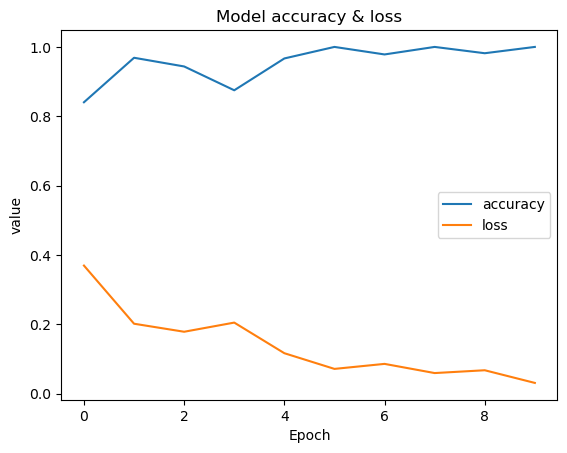

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy & loss')
plt.xlabel('Epoch')
plt.ylabel('value')
plt.legend(['accuracy', 'loss'], loc='center right')
plt.show()

In [27]:
model.save('best_model3.keras')